<a href="https://colab.research.google.com/github/RohanKaushikan/CancerBioinformatics/blob/main/CombinedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trying With More PatientData and Multi Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
!pip install XGBoost

In [ ]:
!pip install seaborn

In [ ]:
data = pd.read_csv('multi_combined_subset.csv')

In [ ]:
import pandas as pd


# Assume `df` is your DataFrame and it has a 'class' column that contains the class labels
# 1. Separate the different classes
df_class_0 = data[data['Disease Free Status'] == 0]
df_class_1 = data[data['Disease Free Status'] == 1]


# Count the number of samples in each class
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)


# Downsample the majority class (assume class 0 is the majority here)
df_class_0_downsampled = df_class_0.sample(2*count_class_1)


# Combine the downsampled majority class DataFrame with the minority class DataFrame
df_downsampled = pd.concat([df_class_0_downsampled, df_class_1], axis=0)


# Shuffle the dataset
df_downsampled = df_downsampled.sample(frac=1).reset_index(drop=True)


# Now `df_downsampled` is the downsampled dataset

In [ ]:
X = df_downsampled.drop('Disease Free Status', axis=1)
y = df_downsampled['Disease Free Status']

In [ ]:
from collections import Counter
print(len(df_downsampled['Hugo_Symbol']))
print(len(Counter(df_downsampled['Hugo_Symbol'])))

16308
9274


In [ ]:
categorical_features = ['Radiation Therapy', 'Consequence', 'Variant_Classification', 'Cancer Stage', 'Race']
#categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
x_encoded = pd.get_dummies(X, columns = categorical_features, drop_first = True)
x_encoded.head()

,Hugo_Symbol,Diagnosis Age,Mutation Count,Radiation Therapy_Yes,Consequence_5_prime_UTR_variant,Consequence_coding_sequence_variant,Consequence_downstream_gene_variant,Consequence_frameshift_variant,Consequence_inframe_deletion,Consequence_inframe_insertion,...,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Asian,Race_Black or African American,Race_White
0,ARID2,64,276,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,WIBG,79,30,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,GPSM2,72,121,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,LIPH,80,63,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,WWP2,51,61,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
x_encoded['Hugo_Symbol'] = label_encoder.fit_transform(x_encoded['Hugo_Symbol'])
x_encoded.head()

,Hugo_Symbol,Diagnosis Age,Mutation Count,Radiation Therapy_Yes,Consequence_5_prime_UTR_variant,Consequence_coding_sequence_variant,Consequence_downstream_gene_variant,Consequence_frameshift_variant,Consequence_inframe_deletion,Consequence_inframe_insertion,...,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Asian,Race_Black or African American,Race_White
0,515,64,276,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,8762,79,30,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,3191,72,121,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4292,80,63,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,8793,51,61,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
numeric_features = ['Diagnosis Age', 'Mutation Count']
#numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the desired columns in the DataFrame
scaler.fit(X_train[['Diagnosis Age', 'Mutation Count']])

# Now transform the columns
X_train[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_train[['Diagnosis Age', 'Mutation Count']])
X_test[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_test[['Diagnosis Age', 'Mutation Count']])

In [ ]:
#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numeric_features),
#        ('cat', categorical_transformer, categorical_features)])

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.utils import class_weight
#model = LogisticRegression(class_weight = 'balanced')
model = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

In [ ]:
#y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [ ]:
confusion_matrix(y_test, y_pred)

array([[2162,   13],
       [  11, 1076]])

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

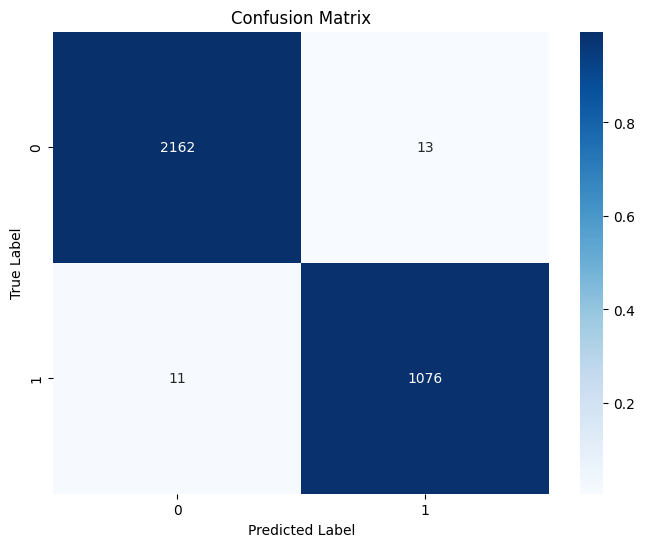

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))
class_names = ['0', '1']
sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 1.00


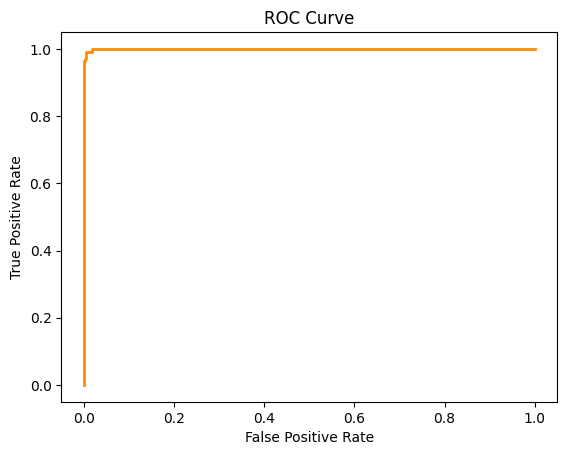

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

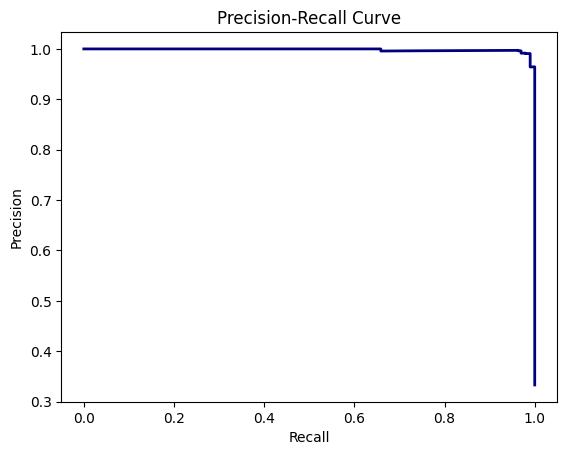

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall, precision, color='navy', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2175
           1       0.99      0.99      0.99      1087

    accuracy                           0.99      3262
   macro avg       0.99      0.99      0.99      3262
weighted avg       0.99      0.99      0.99      3262



# Prediction with 24 Most Common Genes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import xgboost as xgb

In [ ]:
!pip install XGBoost
!pip install seaborn

In [ ]:
df = pd.read_csv('common_genes_subset.csv')

In [ ]:
df_class_0 = df[df['Disease Free Status'] == 0]
df_class_1 = df[df['Disease Free Status'] == 1]


# Count the number of samples in each class
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)
print(count_c)

(4116,)

In [ ]:
import pandas as pd


# Assume `df` is your DataFrame and it has a 'class' column that contains the class labels
# 1. Separate the different classes
df_class_0 = df[df['Disease Free Status'] == 0]
df_class_1 = df[df['Disease Free Status'] == 1]


# Count the number of samples in each class
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)


# Downsample the majority class (assume class 0 is the majority here)
df_class_0_downsampled = df_class_0.sample(4*count_class_1)


# Combine the downsampled majority class DataFrame with the minority class DataFrame
common_df_downsampled = pd.concat([df_class_0_downsampled, df_class_1], axis=0)


# Shuffle the dataset
common_df_downsampled = common_df_downsampled.sample(frac=1).reset_index(drop=True)


# Now `df_downsampled` is the downsampled dataset

In [ ]:
X = common_df_downsampled.drop('Disease Free Status', axis=1)
#WITH ONLY GENE MUTATIONS
y = common_df_downsampled['Disease Free Status']
#X = df.drop('Disease Free Status', axis=1)
#y = df['Disease Free Status']

In [ ]:
categorical_features = ['Radiation Therapy', 'Hugo_Symbol', 'Consequence', 'Variant_Classification', 'Cancer Stage', 'Race']
#categorical_features = ['Hugo_Symbol']
common_x_encoded = pd.get_dummies(X, columns = categorical_features, drop_first = True)
common_x_encoded.head()

,Diagnosis Age,Mutation Count,Radiation Therapy_Yes,Hugo_Symbol_AFF2,Hugo_Symbol_AKAP9,Hugo_Symbol_ANK2,Hugo_Symbol_ANK3,Hugo_Symbol_APOB,Hugo_Symbol_ARID1A,Hugo_Symbol_ASH1L,...,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Asian,Race_Black or African American,Race_White
0,63,87,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,79,238,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,59,65,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,68,5400,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,38,137,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(common_x_encoded, y, test_size=0.2, random_state=42, stratify = y)

In [ ]:
numeric_features = ['Diagnosis Age', 'Mutation Count']
#numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the desired columns in the DataFrame
scaler.fit(X_train[['Diagnosis Age', 'Mutation Count']])

# Now transform the columns
X_train[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_train[['Diagnosis Age', 'Mutation Count']])
X_test[['Diagnosis Age', 'Mutation Count']] = scaler.transform(X_test[['Diagnosis Age', 'Mutation Count']])

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.utils import class_weight
#model = LogisticRegression(class_weight = 'balanced')
model = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.4).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [ ]:
import seaborn as sns
import numpy as np

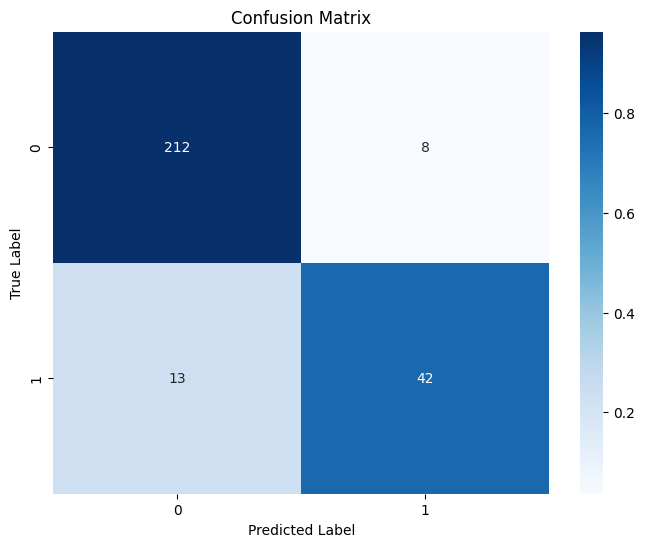

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))
class_names = ['0', '1']
sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.95


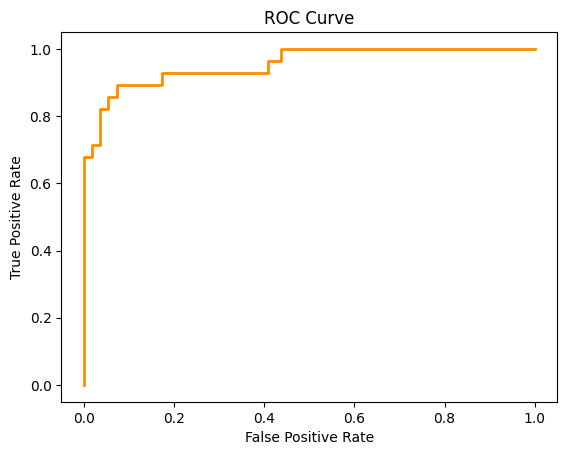

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

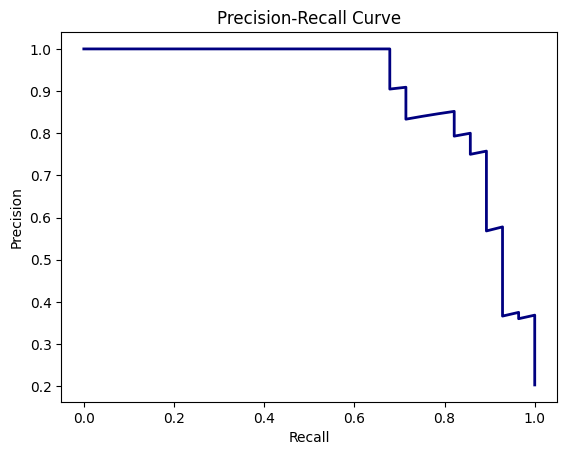

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall, precision, color='navy', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       110
           1       0.83      0.71      0.77        28

    accuracy                           0.91       138
   macro avg       0.88      0.84      0.86       138
weighted avg       0.91      0.91      0.91       138



In [ ]:
feature_importances = model.feature_importances_

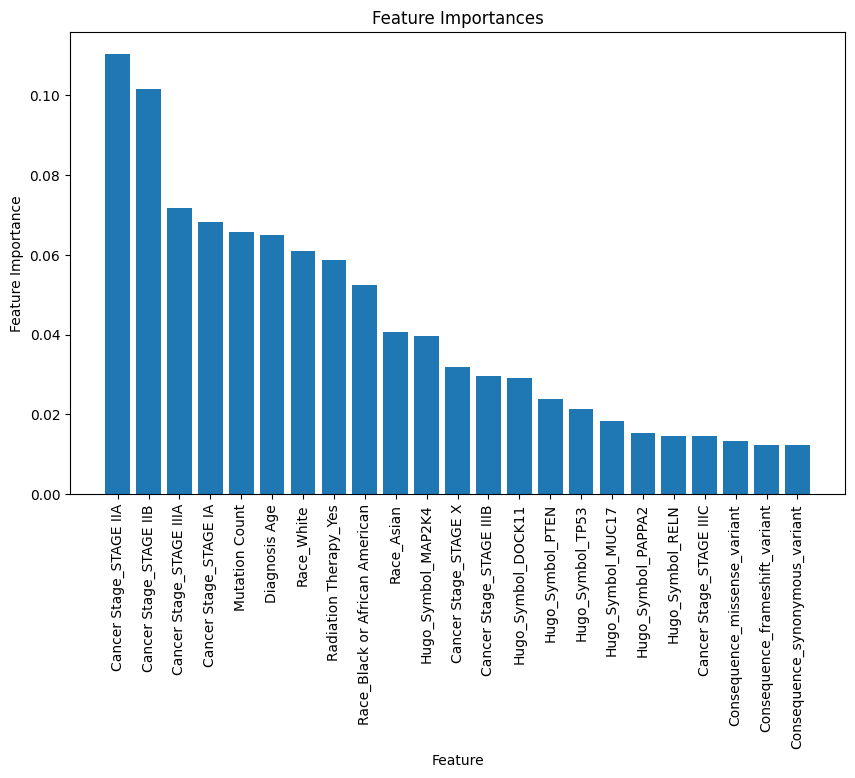

In [ ]:
feature_names = common_x_encoded.columns.tolist()

def plot_feature_importances(importances, feature_names, threshold=0.01):

    # Create a sorted index of feature importances
    sorted_idx = importances.argsort()[::-1]

    # Filter out features with importances below the threshold
    sorted_idx = sorted_idx[importances[sorted_idx] > threshold]

    # Plot the top N features
    N = len(sorted_idx)
    plt.figure(figsize=(10, 6))
    plt.bar(range(N), importances[sorted_idx], align='center')
    plt.xticks(range(N), [feature_names[i] for i in sorted_idx], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title('Feature Importances')
    plt.show()

plot_feature_importances(feature_importances, feature_names)


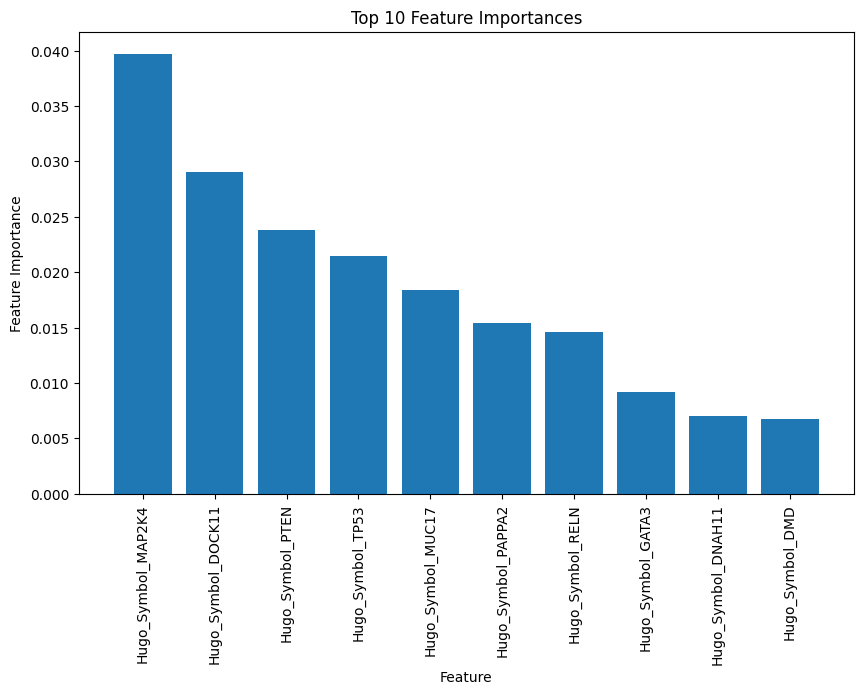

In [ ]:
def plot_feature_importances(importances, feature_names, top_n=10, name_contains="Hugo_Symbol"):
    # Filter feature names by those containing the specified string
    filtered_feature_names = [name for name in feature_names if name_contains in name]

    # Create a sorted index of feature importances
    sorted_idx = importances.argsort()[::-1]

    # Filter the sorted index based on the filtered feature names
    sorted_idx = [idx for idx in sorted_idx if feature_names[idx] in filtered_feature_names]

    # Select the top N features (default is top 10)
    sorted_idx = sorted_idx[:top_n]

    # Plot the top N features
    N = len(sorted_idx)
    plt.figure(figsize=(10, 6))
    plt.bar(range(N), importances[sorted_idx], align='center')
    plt.xticks(range(N), [feature_names[i] for i in sorted_idx], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title('Top {} Feature Importances'.format(top_n))
    plt.show()

# Assuming you already have 'feature_importances' and 'feature_names'
# Replace 'feature_importances' and 'feature_names' with your actual data
plot_feature_importances(feature_importances, feature_names, top_n=10)

# Up Sampled Data (Recurrent)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('common_genes_subset.csv')

In [ ]:


# Assume `df` is your DataFrame and it has a 'Disease Free Status' column
# containing the class labels (0 and 1)

# Separate the different classes
df_class_0 = df[df['Disease Free Status'] == 0]
df_class_1 = df[df['Disease Free Status'] == 1]

# Count the number of samples in each class
count_class_0 = len(df_class_0)
count_class_1 = len(df_class_1)

# Upsample the minority class (class 1)
df_class_1_upsampled = df_class_1.sample(count_class_0, replace=True, random_state = 42)

# Combine the original majority class DataFrame with the upsampled minority class DataFrame
common_df_upsampled = pd.concat([df_class_0, df_class_1_upsampled], axis=0)

# Shuffle the dataset
common_df_upsampled = common_df_upsampled.sample(frac=1, random_state = 42).reset_index(drop=True)

In [ ]:
X = common_df_upsampled.drop(['Disease Free Status', 'Radiation Therapy', 'Mutation Count', 'Race', 'Cancer Stage', 'Consequence', 'Variant_Classification', 'Diagnosis Age'], axis=1)
#WITH ONLY GENE MUTATIONS
y = common_df_upsampled['Disease Free Status']

In [ ]:
#categorical_features = ['Radiation Therapy', 'Hugo_Symbol', 'Consequence', 'Variant_Classification', 'Cancer Stage', 'Race']
categorical_features = ['Hugo_Symbol']
up_common_x_encoded = pd.get_dummies(X, columns = categorical_features, drop_first = True)
up_common_x_encoded.head()

,Hugo_Symbol_GATA3,Hugo_Symbol_HMCN1,Hugo_Symbol_KMT2C,Hugo_Symbol_MAP3K1,Hugo_Symbol_MUC16,Hugo_Symbol_PIK3CA,Hugo_Symbol_RYR2,Hugo_Symbol_SPTA1,Hugo_Symbol_TP53,Hugo_Symbol_TTN,Hugo_Symbol_USH2A
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(up_common_x_encoded, y, test_size=0.1, random_state=42, stratify = y)

In [ ]:
#numeric_features = ['Diagnosis Age', 'Mutation Count']
numeric_features = ['Diagnosis Age']
#numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the desired columns in the DataFrame
scaler.fit(X_train[['Diagnosis Age']])

# Now transform the columns
X_train[['Diagnosis Age']] = scaler.transform(X_train[['Diagnosis Age']])
X_test[['Diagnosis Age']] = scaler.transform(X_test[['Diagnosis Age']])

KeyError: ignored

In [ ]:
from sklearn.utils import class_weight
#model = LogisticRegression(class_weight = 'balanced')
model = xgb.XGBClassifier(learning_rate = 0.1, n_estimators = 100)

In [ ]:
X_train.head(20)

,Hugo_Symbol_GATA3,Hugo_Symbol_HMCN1,Hugo_Symbol_KMT2C,Hugo_Symbol_MAP3K1,Hugo_Symbol_MUC16,Hugo_Symbol_PIK3CA,Hugo_Symbol_RYR2,Hugo_Symbol_SPTA1,Hugo_Symbol_TP53,Hugo_Symbol_TTN,Hugo_Symbol_USH2A
675,0,1,0,0,0,0,0,0,0,0,0
180,1,0,0,0,0,0,0,0,0,0,0
630,0,1,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,1,0,0,0,0,0
2197,0,0,0,0,0,0,0,0,1,0,0
1968,0,0,0,0,0,1,0,0,0,0,0
1305,0,0,0,0,1,0,0,0,0,0,0
1156,0,0,0,0,1,0,0,0,0,0,0
2101,0,0,0,0,1,0,0,0,0,0,0
2027,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.4).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.56


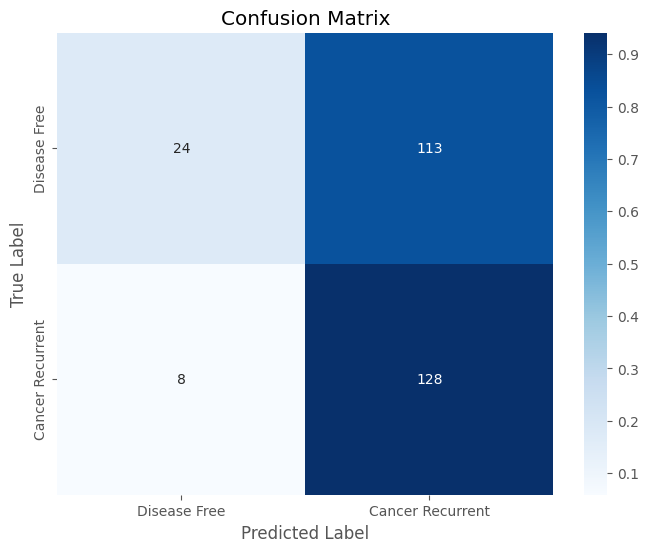

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))
class_names = ['Disease Free', 'Cancer Recurrent']
sns.heatmap(cm_normalized, annot=cm, fmt='g', cmap='Blues',
xticklabels=class_names,
yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

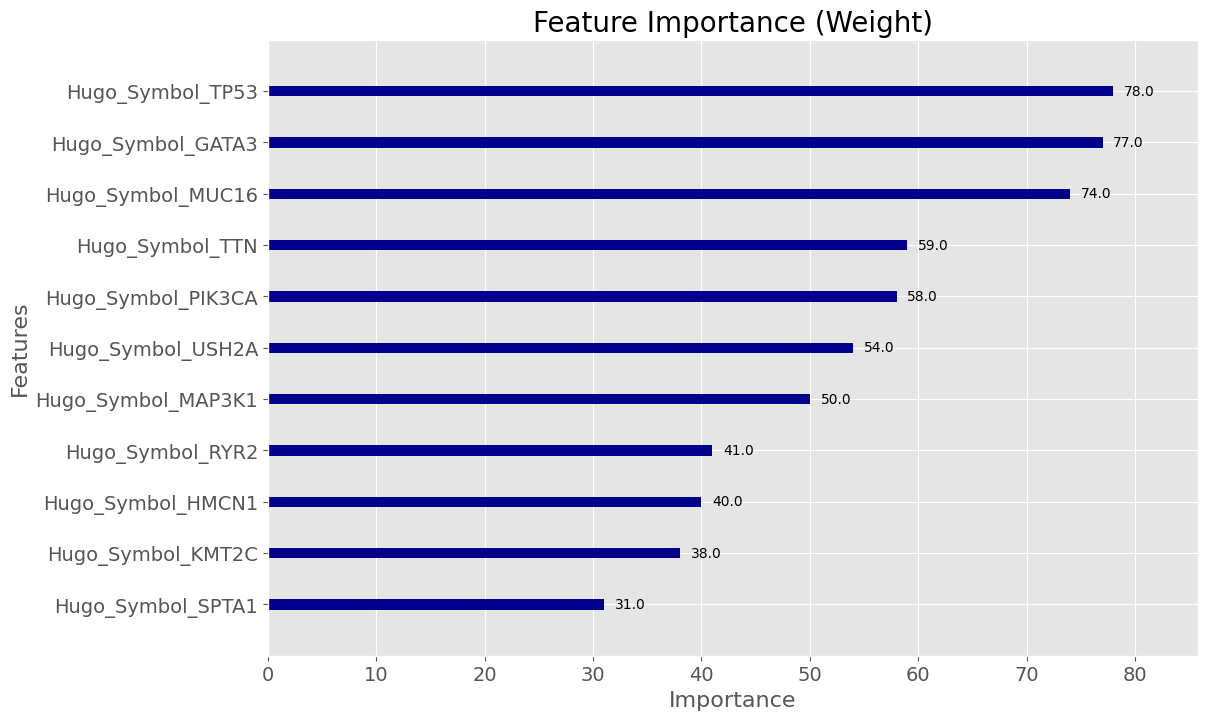

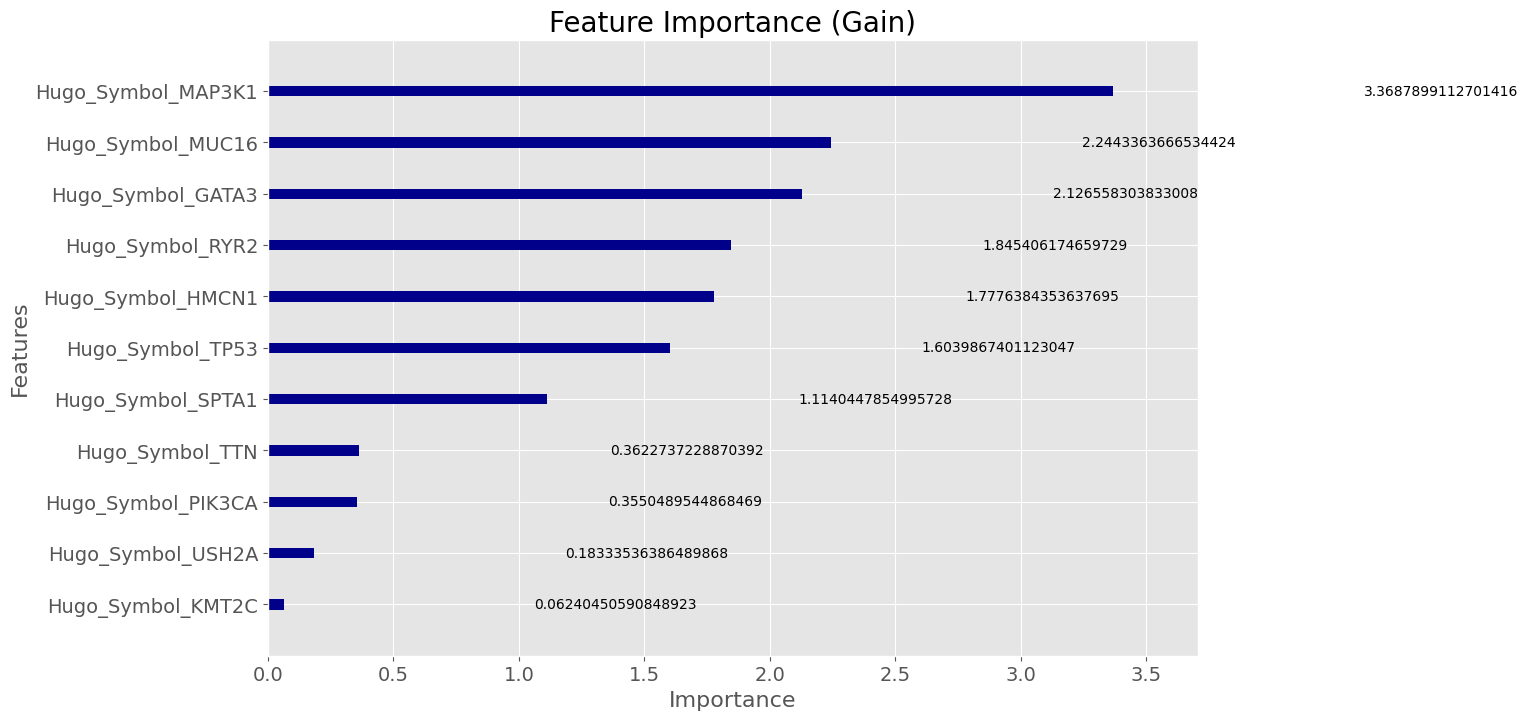

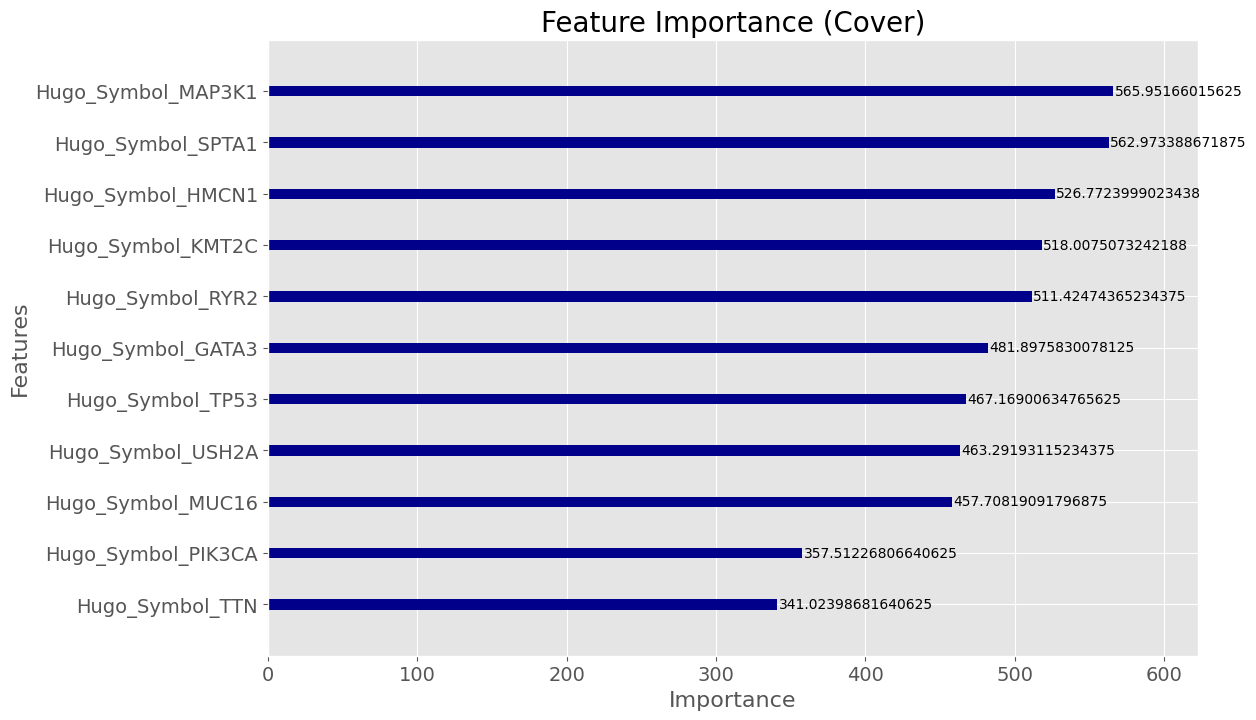

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb


# Use the ggplot style
plt.style.use('ggplot')


# Function to make plots prettier
def plot_importance_pretty(model, importance_type):
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plotting the importance
    xgb.plot_importance(model, importance_type=importance_type, ax=ax, color='darkblue')

    # Adding titles and labels
    ax.set_title(f'Feature Importance ({importance_type.capitalize()})', size=20)
    ax.set_xlabel('Importance', size=16)
    ax.set_ylabel('Features', size=16)

    # Adjusting font size
    for tick in ax.get_xticklabels():
        tick.set_fontsize(14)
    for tick in ax.get_yticklabels():
        tick.set_fontsize(14)

    plt.show()


# Plotting the importances
plot_importance_pretty(model, 'weight')
plot_importance_pretty(model, 'gain')
plot_importance_pretty(model, 'cover')

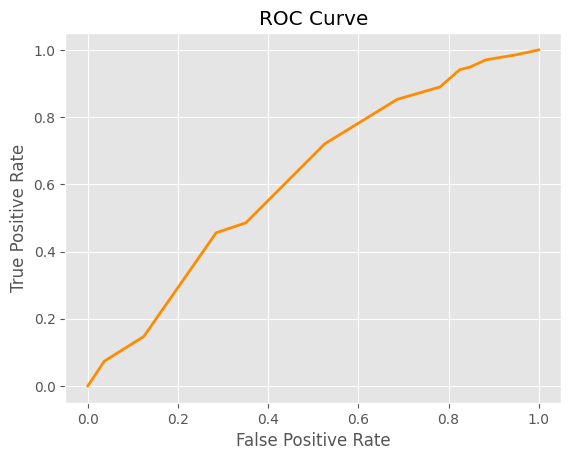

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

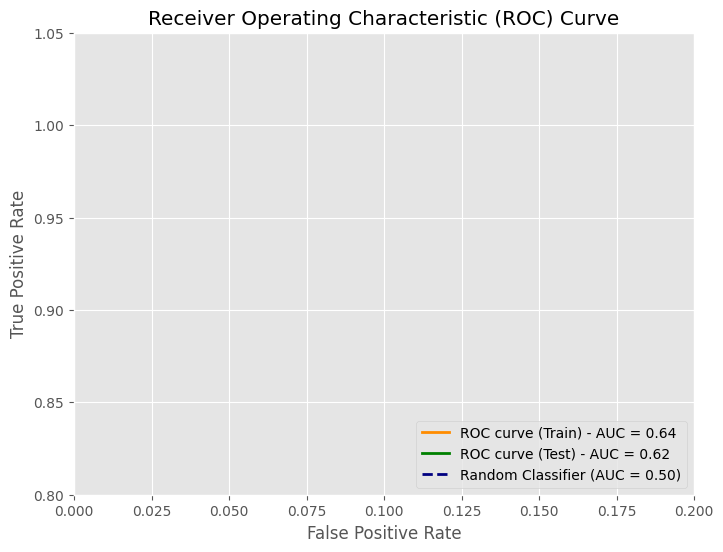

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict probabilities for both training and testing data
y_train_probs = model.predict_proba(X_train)[:, 1]
y_test_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Random classifier (50% chance of being correct)
fpr_random = tpr_random = np.linspace(0, 1, 100)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (Train) - AUC = {:.2f}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve (Test) - AUC = {:.2f}'.format(roc_auc_test))
plt.plot(fpr_random, tpr_random, color='navy', linestyle='--', lw=2, label='Random Classifier (AUC = 0.50)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.xlim([0.0, 0.2])  # Adjust x-axis limits to zoom in
plt.ylim([0.8, 1.05])  # Adjust y-axis limits to zoom in
plt.show()

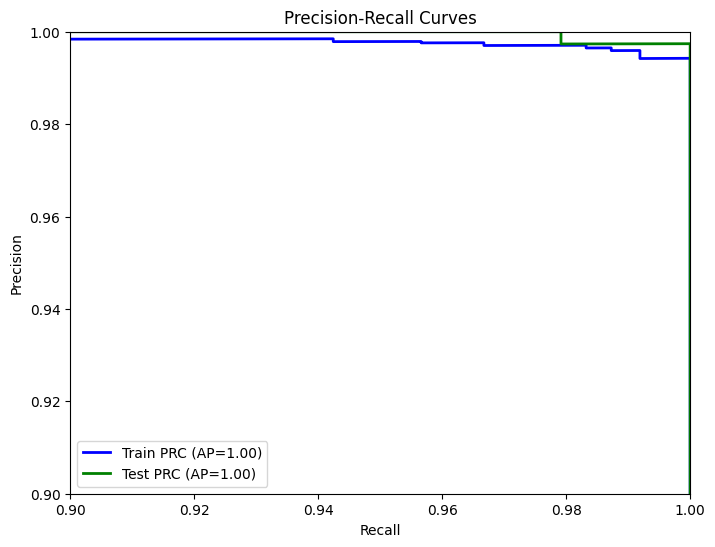

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve and average precision for training data
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_probs)
average_precision_train = average_precision_score(y_train, y_train_probs)

# Calculate precision-recall curve and average precision for testing data
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_probs)
average_precision_test = average_precision_score(y_test, y_test_probs)

# Plot Precision-Recall Curves for both training and testing data
plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, color='blue', lw=2, label='Train PRC (AP={:.2f})'.format(average_precision_train))
plt.plot(recall_test, precision_test, color='green', lw=2, label='Test PRC (AP={:.2f})'.format(average_precision_test))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.xlim([0.9, 1.0])  # Adjust x-axis limits to zoom in
plt.ylim([0.9, 1.0])  # Adjust y-axis limits to zoom in
plt.show()

In [ ]:
feature_importances = model.feature_importances_

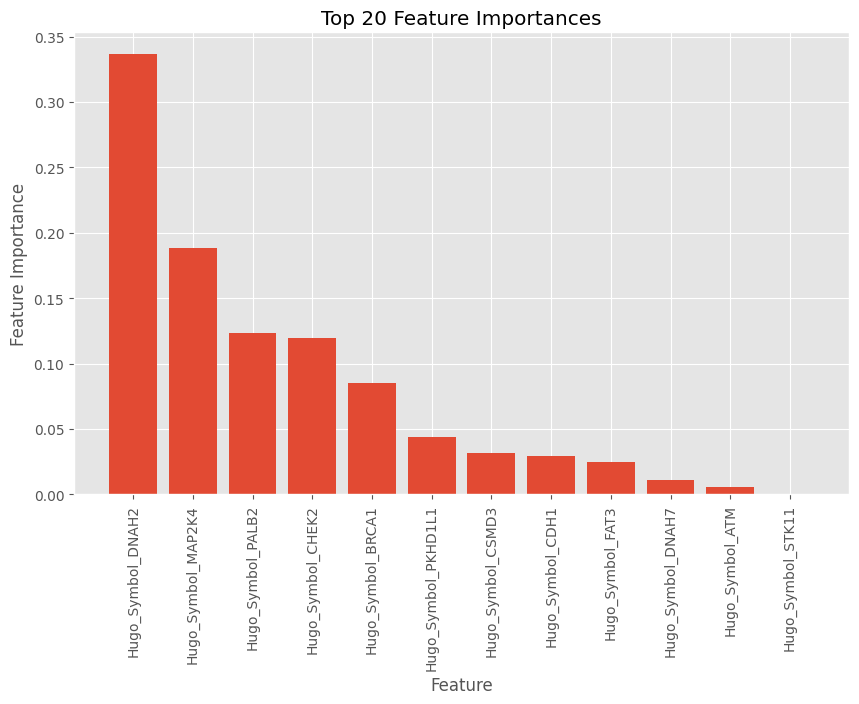

In [ ]:
feature_names = up_common_x_encoded.columns.tolist()

def plot_feature_importances(importances, feature_names, top_n=10, name_contains="Hugo_Symbol"):
    # Filter feature names by those containing the specified string
    filtered_feature_names = [name for name in feature_names if name_contains in name]

    # Create a sorted index of feature importances
    sorted_idx = importances.argsort()[::-1]

    # Filter the sorted index based on the filtered feature names
    sorted_idx = [idx for idx in sorted_idx if feature_names[idx] in filtered_feature_names]

    # Select the top N features (default is top 10)
    sorted_idx = sorted_idx[:top_n]

    # Plot the top N features
    N = len(sorted_idx)
    plt.figure(figsize=(10, 6))
    plt.bar(range(N), importances[sorted_idx], align='center')
    plt.xticks(range(N), [feature_names[i] for i in sorted_idx], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title('Top {} Feature Importances'.format(top_n))
    plt.show()

# Assuming you already have 'feature_importances' and 'feature_names'
# Replace 'feature_importances' and 'feature_names' with your actual data
plot_feature_importances(feature_importances, feature_names, top_n=20)

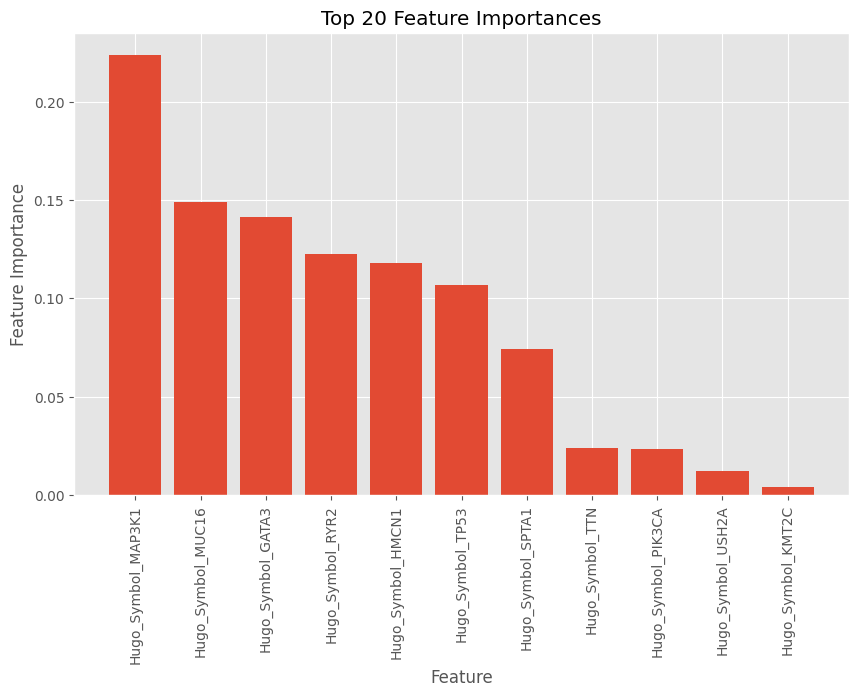

In [ ]:
feature_names = up_common_x_encoded.columns.tolist()

def plot_feature_importances(importances, feature_names, top_n=10):
    # Filter feature names by those containing the specified string
    #filtered_feature_names = [name for name in feature_names if name_contains in name]

    # Create a sorted index of feature importances
    sorted_idx = importances.argsort()[::-1]

    # Filter the sorted index based on the filtered feature names
    sorted_idx = [idx for idx in sorted_idx]

    # Select the top N features (default is top 10)
    sorted_idx = sorted_idx[:top_n]

    # Plot the top N features
    N = len(sorted_idx)
    plt.figure(figsize=(10, 6))
    plt.bar(range(N), importances[sorted_idx], align='center')
    plt.xticks(range(N), [feature_names[i] for i in sorted_idx], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title('Top {} Feature Importances'.format(top_n))
    plt.show()

# Assuming you already have 'feature_importances' and 'feature_names'
# Replace 'feature_importances' and 'feature_names' with your actual data
plot_feature_importances(feature_importances, feature_names, top_n=20)

In [ ]:
# Get feature importances from your trained model
feature_importances = model.feature_importances_

# Create a DataFrame to organize the results
importance_df = pd.DataFrame({'Feature': up_common_x_encoded.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Determine the direction of correlation
important_genes = importance_df['Feature']
positive_correlation_genes = important_genes[feature_importances > 0]
negative_correlation_genes = important_genes[feature_importances < 0]

# Print genes with positive and negative correlation
print("Genes with Positive Correlation to Recurrence:")
print(positive_correlation_genes)

print("\nGenes with Negative Correlation to Recurrence:")
print(negative_correlation_genes)

Genes with Positive Correlation to Recurrence:
2                         Radiation Therapy_Yes
1                                Mutation Count
128                                  Race_Asian
130                                  Race_White
122                      Cancer Stage_STAGE IIA
68                           Hugo_Symbol_PIK3CA
51                           Hugo_Symbol_MAP3K1
62                              Hugo_Symbol_NEB
104                     Consequence_stop_gained
86                            Hugo_Symbol_TENM1
72                             Hugo_Symbol_PTEN
85                            Hugo_Symbol_SYNE2
73                            Hugo_Symbol_PTPRD
82                            Hugo_Symbol_SRCAP
121                       Cancer Stage_STAGE II
114               Variant_Classification_Intron
116    Variant_Classification_Nonsense_Mutation
115    Variant_Classification_Missense_Mutation
112         Variant_Classification_In_Frame_Del
91                             Hugo_Symbo

In [ ]:
up_common_x_encoded.head()

,Diagnosis Age,Mutation Count,Radiation Therapy_Yes,Hugo_Symbol_AFF2,Hugo_Symbol_AKAP9,Hugo_Symbol_ANK2,Hugo_Symbol_ANK3,Hugo_Symbol_APOB,Hugo_Symbol_ARID1A,Hugo_Symbol_ASH1L,...,Cancer Stage_STAGE II,Cancer Stage_STAGE IIA,Cancer Stage_STAGE IIB,Cancer Stage_STAGE IIIA,Cancer Stage_STAGE IIIB,Cancer Stage_STAGE IIIC,Cancer Stage_STAGE X,Race_Asian,Race_Black or African American,Race_White
0,49,162,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,69,436,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,59,91,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,63,114,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,65,89,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, up_common_x_encoded, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.98763826 0.9856864  0.98502604 0.99674479 0.98828125]
Average CV Score:  0.9886753483517674
Number of CV Scores used in Average:  5
